# user_logデータ
- 前処理・可視化
- 注：データ量が多いため、処理時間かかる

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

comma_formatter = mpl.ticker.FuncFormatter(lambda x, _: u'{:,.0f}'.format(x))
sns.set(style='darkgrid', context='talk')
mpl.rcParams['font.family'] = 'Meiryo'
% matplotlib inline

In [2]:
data_dir = '../../data'
fig_dir = '../figure'
output_dir = '../output'

# データ読み込み

In [3]:
%%time
fname = os.path.join(data_dir, 'user_logs.csv.gz')
df_user_logs_raw = pd.read_csv(fname, parse_dates=['date']) # TIME CONSUMING

CPU times: user 3min 8s, sys: 12 s, total: 3min 20s
Wall time: 3min 26s


In [4]:
print('count: {:,}'.format(len(df_user_logs_raw)))

count: 73,647,922


In [5]:
df_user_logs_raw.head(2)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++rMjxjARDHEx9zEFOpvJEDBDhT1ncn0PEnCx3llA0=,2015-01-15,1,0,0,0,0,1,65.071
1,sHa/eolo6Tnk+K3rVVitG7kgdK2P1o0wozm77evfvt8=,2016-11-08,0,0,0,0,6,1,1407.630


In [6]:
desc_raw = df_user_logs_raw.describe(include='all') # TIME CONSUMING
desc_raw

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,73647922,73647922,7.364792e+07,7.364792e+07,7.364792e+07,7.364792e+07,7.364792e+07,7.364792e+07,7.364792e+07
unique,981717,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,a9om23G8xlynpKU8X/q68ccjxCTyonue/Y9E5RfZ8V0=,2017-01-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,790,113417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.512171e+00,1.637387e+00,1.015126e+00,1.129535e+00,3.066527e+01,3.003986e+01,-1.437835e+12
std,NaN,NaN,1.537442e+01,4.240055e+00,2.165061e+00,2.817380e+00,4.335244e+01,3.365628e+01,1.152707e+14
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.889238e+03


- total_secs
    - 負値が存在する。最大値が大きすぎる => 補完
- 曲数も気にかけたほうが良さそう

# 集計・可視化

## レコード数など

- 日別レコード数

In [7]:
# 日別レコード数
date_dist = df_user_logs_raw.date.value_counts().sort_index()
date_dist.head() # 一部

2015-01-01    73217
2015-01-02    75381
2015-01-03    76698
2015-01-04    77681
2015-01-05    76713
Name: date, dtype: int64

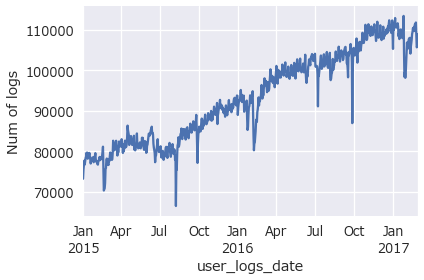

In [8]:
date_dist.plot.line()
plt.xlabel('user_logs_date')
plt.ylabel('Num of logs')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'line_user_logs_date.png'), dpi=200)
# - 1.4倍程度の伸び

- 月間アクティブユーザー（MAU）

In [9]:
# 重いのでサンプリング
df_user_logs_sample = df_user_logs_raw.sample(n=100000, random_state=0)

In [10]:
# 年月
df_user_logs_sample['ym'] = df_user_logs_sample.date.dt.strftime('%Y-%m')

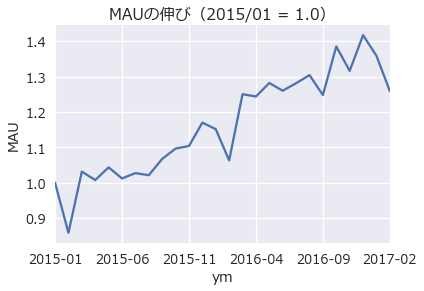

In [11]:
# 月間アクティブユーザー数（MAU）も増えている（サンプリングデータ）
mau = df_user_logs_sample.groupby('ym').msno.nunique()
mau = mau / mau.iloc[0]
mau.plot.line()
plt.title('MAUの伸び（2015/01 = 1.0）')
plt.ylabel('MAU')
plt.savefig(os.path.join(fig_dir, 'line_mau_growth.png'), dpi=200)

- 相関係数

In [12]:
# 相関係数
cols_num = df_user_logs_raw.columns[df_user_logs_raw.columns.str.contains('num_')].values
df_user_logs_sample[cols_num].corr()

,num_25,num_50,num_75,num_985,num_100,num_unq
num_25,1.000000,0.462879,0.431006,0.278831,0.125637,0.487033
num_50,0.462879,1.000000,0.628925,0.273036,0.099398,0.370673
num_75,0.431006,0.628925,1.000000,0.377091,0.146004,0.377056
num_985,0.278831,0.273036,0.377091,1.000000,0.152915,0.320180
num_100,0.125637,0.099398,0.146004,0.152915,1.000000,0.740437
num_unq,0.487033,0.370673,0.377056,0.320180,0.740437,1.000000


## total_secs

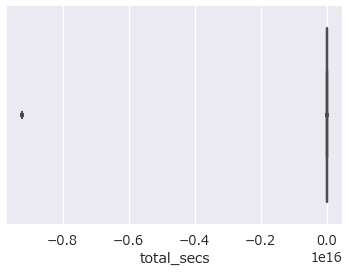

In [13]:
# 箱ひげ図
sns.boxplot(df_user_logs_sample.total_secs)
plt.savefig(os.path.join(fig_dir, 'boxplot_total_secs_sample.png'), dpi=200)
# - 異常値あり

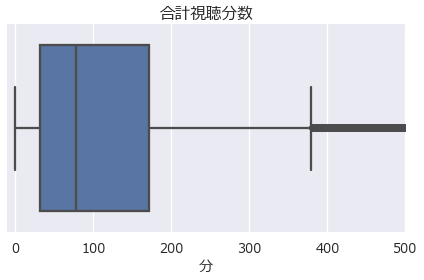

In [14]:
# 合計視聴分数
sns.boxplot(df_user_logs_sample.total_secs / 60)
plt.xlabel('分')
plt.title('合計視聴分数')
plt.xlim(-1e+1, 5e+2)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'boxplot_total_secs_sample_2.png'), dpi=200)

In [15]:
df_user_logs_sample.total_secs.describe(percentiles=[0.99, 0.999, 0.9999])
# - 正常っぽい total_secs の範囲は 99%点~99.99%点付近
# => 1e+5 を前処理時の閾値に用いる

count     1.000000e+05
mean     -1.475740e+12
std       1.166587e+14
min      -9.223372e+15
50%       4.681351e+03
99%       4.452634e+04
99.9%     7.936838e+04
99.99%    1.436534e+05
max       7.621949e+05
Name: total_secs, dtype: float64

- 平均曲長の推定

In [16]:
# 異常そうなレコードを除く
# - num_100だけが入っているレコードを用いる
# - 合計視聴秒数が [0, 1e+5] であるもの
index_1 = df_user_logs_raw[['num_25', 'num_50', 'num_75', 'num_985']].sum(axis=1) == 0
index_2 = df_user_logs_raw.total_secs.between(0, 1e+5)
df_user_logs_valid = df_user_logs_raw[index_1 & index_2]

In [17]:
# 平均曲長
average_secs = df_user_logs_valid.total_secs / df_user_logs_valid.num_100 / 60
average_secs.describe()
# - 1曲あたりの平均曲長は 4.164分（中央値: 4.133分）

count    9.969721e+06
mean     4.164432e+00
std      1.686539e+00
min      1.833333e-04
25%      3.820634e+00
50%      4.133450e+00
75%      4.391617e+00
max      1.457850e+03
dtype: float64

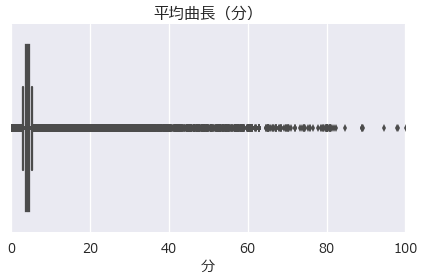

In [18]:
# 平均曲長を推定
sns.boxplot(average_secs)
plt.xlim(0, 100)
plt.title('平均曲長（分）')
plt.xlabel('分')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'boxplot_average_minutes_per_song.png'), dpi=200)

# 前処理

- total_secsの対処
    - 異常と考えられるtotal_secsレコードを推定

In [19]:
# 曲数カラム
cols_num = df_user_logs_raw.columns[df_user_logs_raw.columns.str.contains('num_[0-9]+')]

# 曲長の係数
coef = np.array([0.25, 0.50, 0.75, 0.985, 1])

# total_secsの推定値（平均曲長（分） * 60秒）
total_secs_est = (df_user_logs_raw[cols_num] * coef).sum(axis=1) * 4.164 * 60

# 補完対象
# - total_secsが負、かつ1日の秒数より大きいデータ
index = (df_user_logs_raw.total_secs < 0) | (df_user_logs_raw.total_secs > 24*60*60)
df_user_logs_raw.loc[index, 'total_secs'] = total_secs_est[index]

In [20]:
df_user_logs_raw.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++rMjxjARDHEx9zEFOpvJEDBDhT1ncn0PEnCx3llA0=,2015-01-15,1,0,0,0,0,1,65.071
1,sHa/eolo6Tnk+K3rVVitG7kgdK2P1o0wozm77evfvt8=,2016-11-08,0,0,0,0,6,1,1407.630
2,sxarnAsqdmYky9X21JVVyWGLkxxVZje7zdbWboC/1j0=,2015-08-20,1,1,0,1,91,40,22850.465
3,++0JQrW5emxGI8c12iOa6NrdW5jInaSsMMizAsN/Gr8=,2016-01-18,4,0,0,2,10,14,3103.074
4,+++rMjxjARDHEx9zEFOpvJEDBDhT1ncn0PEnCx3llA0=,2015-01-19,0,0,0,0,2,1,474.698


- 補完してもなお残る異常値は除去する

In [21]:
# 依然残る異常値を判別（99.9%点）
total_secs_thrs = df_user_logs_raw.total_secs.quantile(.999)

# 絞り込み
index_ok = df_user_logs_raw.total_secs <= total_secs_thrs
df_user_logs = df_user_logs_raw[index_ok]

In [22]:
# 統計量
desc_2 = df_user_logs.describe(include='all') # TIME CONSUMING
desc_2

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,73574274,73574274,7.357427e+07,7.357427e+07,7.357427e+07,7.357427e+07,7.357427e+07,7.357427e+07,7.357427e+07
unique,981711,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CwQDYAJLbw7JxpWMrVL7i0QERCfMa4/OVpm3YOKI5M4=,2017-01-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,790,113291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.506128e+00,1.635338e+00,1.013484e+00,1.126400e+00,3.024352e+01,2.990868e+01,8.013455e+03
std,NaN,NaN,1.528903e+01,4.184903e+00,2.113645e+00,2.745608e+00,3.851438e+01,3.312273e+01,9.485040e+03
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e-03
25%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.888471e+03


In [23]:
df_user_logs.isnull().any()

msno          False
date          False
num_25        False
num_50        False
num_75        False
num_985       False
num_100       False
num_unq       False
total_secs    False
dtype: bool

# 書き出し

In [24]:
len(df_user_logs_raw), len(df_user_logs)

(73647922, 73574274)

In [25]:
from sklearn.externals import joblib

In [26]:
%%time

# データが大きいのでpickle化
fname = os.path.join(data_dir, 'df_user_logs_preprocessed.pickle')
joblib.dump(df_user_logs, fname, protocol=3, compress=0)

CPU times: user 11.2 s, sys: 16.8 s, total: 28 s
Wall time: 47.2 s


In [27]:
# ファイル名
fname_desc = os.path.join(output_dir, 'df_user_logs_raw_decribe.csv')
fname_desc_2 = os.path.join(output_dir, 'df_user_logs_preprocessed_decribe.csv')

# 統計量
desc_raw.to_csv(fname_desc)
desc_2.to_csv(fname_desc_2)